## Feature selection and Logistic regression for Bankruptcy data

We start with 95 features-- boil it down to -- just 3 features-- model a logistic regression on it.

**Results:** For an imbalanced data with $\sim 97%$ values $negative (0, not bankrupt)$. We choose the metric as F2 score, to account for the assumption that to missclassify a bankrupt company (False negative) is more costly.

The most preliminary model, which has a lot of scope for improvement, gives recall_score=0.86 and f2_Score=0.52. 

**Scope for improvement:** Try other sets of features. Slowly increase the number of features from 3. Implement CV on threshold value of probabilty to prediction. Combine and create better features. 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.tree import DecisionTreeClassifier

In [3]:
df=pd.read_csv('./data.csv')
#null check
df.columns[df.isnull().sum()!=0]

Index([], dtype='object')

### Data Split

In [282]:
# data split (split data at early stage to avoid data snooping)
df_train, df_test=train_test_split(df,random_state=42, train_size=0.75)
y_name=df.columns[0]
#df_train=df.sample(frac=0.75,random_state=42)
#df_test=df.drop(df_train.index)

### Data Introduction

In [5]:
df_train.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
2825,0,0.492663,0.550207,0.539751,0.646168,0.646168,0.999330,0.797829,0.809604,0.303537,...,0.807538,0.018425,0.624224,0.646167,0.842213,0.295068,0.026791,0.565158,1,0.014980
251,0,0.451567,0.494003,0.502757,0.594740,0.594791,0.998916,0.797137,0.809078,0.303194,...,0.769345,0.014932,0.624274,0.594740,0.837952,0.279378,0.026568,0.563808,1,0.030844
1209,0,0.514698,0.571195,0.564002,0.600528,0.600528,0.999054,0.797446,0.809353,0.303446,...,0.807833,0.000979,0.690700,0.600523,0.841299,0.283328,0.027549,0.567263,1,0.021427
4989,0,0.512163,0.599270,0.566733,0.599021,0.599021,0.999020,0.797484,0.809413,0.303584,...,0.820229,0.009966,0.628624,0.599020,0.842259,0.281235,0.027002,0.565997,1,0.025002
5396,0,0.598011,0.643262,0.643825,0.617233,0.617233,0.999229,0.797643,0.809517,0.303424,...,0.857429,0.000398,0.624207,0.617234,0.844172,0.277753,0.026791,0.565160,1,0.041749


In [6]:
df_train.describe(include='all')

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,5114.000000,5114.000000,5114.000000,5114.000000,5114.000000,5114.000000,5114.000000,5114.000000,5114.000000,5114.000000,...,5114.000000,5.114000e+03,5114.000000,5114.000000,5114.000000,5114.000000,5114.000000,5114.000000,5114.0,5114.000000
mean,0.031678,0.505570,0.558930,0.553889,0.607971,0.607951,0.998882,0.797280,0.809152,0.303514,...,0.807878,1.865350e+07,0.623935,0.607969,0.840358,0.280366,0.027641,0.565325,1.0,0.047878
std,0.175158,0.061792,0.066553,0.062583,0.016655,0.016634,0.005507,0.009802,0.011981,0.008433,...,0.041107,3.897754e+08,0.013612,0.016655,0.015397,0.012221,0.017865,0.012591,0.0,0.051433
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.612132,0.160516,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.133503,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476491,0.535775,0.527196,0.600508,0.600499,0.998970,0.797386,0.809312,0.303465,...,0.796871,9.008885e-04,0.623639,0.600507,0.840122,0.276949,0.026791,0.565158,1.0,0.024535
50%,0.000000,0.503681,0.560565,0.552840,0.606084,0.606077,0.999023,0.797465,0.809377,0.303525,...,0.810869,2.083652e-03,0.623879,0.606083,0.841202,0.278780,0.026808,0.565253,1.0,0.033800
75%,0.000000,0.536038,0.589893,0.584707,0.613867,0.613817,0.999096,0.797580,0.809470,0.303587,...,0.826879,5.242172e-03,0.624180,0.613863,0.842351,0.281442,0.026913,0.565729,1.0,0.052821
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999778,1.000000,1.000000,0.730252,...,0.982879,9.820000e+09,1.000000,1.000000,1.000000,0.745352,1.000000,0.736985,1.0,1.000000


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5114 entries, 2825 to 860
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 5114 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  5114 non-null   float64
 2    ROA(A) before interest and % after tax                   5114 non-null   float64
 3    ROA(B) before interest and depreciation after tax        5114 non-null   float64
 4    Operating Gross Margin                                   5114 non-null   float64
 5    Realized Sales Gross Margin                              5114 non-null   float64
 6    Operating Profit Rate                                    5114 non-null   float64
 7    Pre-tax net Interest Rate                                5114 non-null   float64
 8    After-tax net I

## Feature Selection

https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection

In [283]:
X=df_train.drop(y_name,axis=1)
y=df_train[[y_name]]

### Variance threshold

In [72]:
# variance th selection- remove features with 0 
from sklearn.feature_selection import VarianceThreshold
var_sel0 = VarianceThreshold(threshold=0)# default th=0
var_sel0.fit(X)

mask_v0=var_sel0.get_support() # boolean, True for features selected

In [73]:
# convert selected to pd.df
X_v0=var_sel0.transform(X)
X_v0=pd.DataFrame(X_v0,columns=X.columns[mask_v0])
X_v0.head(2)

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,0.492663,0.550207,0.539751,0.646168,0.646168,0.999330,0.797829,0.809604,0.303537,0.781916,...,0.0,0.807538,0.018425,0.624224,0.646167,0.842213,0.295068,0.026791,0.565158,0.014980
1,0.451567,0.494003,0.502757,0.594740,0.594791,0.998916,0.797137,0.809078,0.303194,0.781333,...,0.0,0.769345,0.014932,0.624274,0.594740,0.837952,0.279378,0.026568,0.563808,0.030844


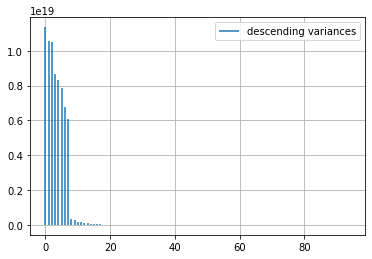

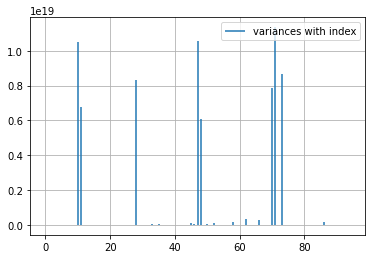

In [74]:
plt.vlines(x=list(range(0,X.shape[1])),ymin=0,ymax=-np.sort(-var_selector.variances_),label='descending variances')
plt.grid()
plt.legend()
plt.show()
#plt.plot(var_selector.variances_,label='variances with index')
plt.vlines(x=list(range(0,X.shape[1])),ymin=0,ymax=var_selector.variances_,label='variances with index')
plt.grid()
plt.legend()
plt.show()

In [75]:
# this helps us choose further thresholds
np.sort(var_selector.variances_)

array([0.00000000e+00, 2.75857736e-07, 3.76905754e-06, 3.03167041e-05,
       4.19644735e-05, 6.86692025e-05, 7.10978889e-05, 7.22640913e-05,
       9.45664341e-05, 9.49885451e-05, 9.60642159e-05, 1.20772888e-04,
       1.20772888e-04, 1.21603635e-04, 1.32010206e-04, 1.43518694e-04,
       1.49326353e-04, 1.49337426e-04, 1.58509904e-04, 1.63915396e-04,
       1.75974866e-04, 1.79073835e-04, 1.85246444e-04, 1.92753626e-04,
       2.37024996e-04, 2.42797739e-04, 2.44243890e-04, 2.46664600e-04,
       2.76633982e-04, 2.77320007e-04, 2.77320464e-04, 3.07459465e-04,
       3.19092888e-04, 3.38187292e-04, 3.76402060e-04, 3.88038498e-04,
       5.87688946e-04, 6.24755630e-04, 6.74527690e-04, 7.84077320e-04,
       7.86813217e-04, 7.97130391e-04, 8.30622583e-04, 9.17905572e-04,
       9.68785345e-04, 9.76752338e-04, 1.04208766e-03, 1.14906436e-03,
       1.15668578e-03, 1.19314319e-03, 1.19922166e-03, 1.19984164e-03,
       1.23383061e-03, 1.43627453e-03, 1.68944063e-03, 2.31065661e-03,
      

#### Put X=X_v0
As, in every situation we will make this transform.

In [285]:
X=X_v0

#### some further thresholds 

In [83]:
# we choose thresholds to be
th=[1,1e-2,1e-4]
var_sel=[]
mask_v=[]
i=0
for th in th:
    var_sel.append(VarianceThreshold(threshold=th))# default th=0
    var_sel[i].fit(X)
    mask_v.append(var_sel[i].get_support()) # boolean, True for features selected
    i=i+1


In [84]:
# mask for columns with top 20 variances
mask_var_20=np.isin(var_selector.variances_,np.sort(var_selector.variances_)[-20:])

### X_s, standardised X= X_v0

In [93]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_s=scaler.fit_transform(X)

X_s=pd.DataFrame(X_s,columns=X.columns)


### SelectKBest
Based on univariate statistical tests-  F-test (if variabiity between group means larger than variability within groups)

Low p-value implies feature corr with target.

Ref: https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection

In [95]:
#  anova_F test

from sklearn.feature_selection import SelectKBest, f_classif

# Ftest or ANOVA
anova_selector=SelectKBest(f_classif, k=10)
X_anova_10 = anova_selector.fit_transform(X_s, y)

mask_anova = anova_selector.get_support()
mask_full_anova=anova_selector.pvalues_<0.05
anova_10_features=anova_selector.get_feature_names_out() 
 

# other tests classification-mutual_info_classif, FPR test, FDR test (SelectFpr,SelectFdr,SelectFwe)

# feature selection for regression task 
#        - sklearn.feature_selection.f_regression: F-stat and p-value wrt each feature
#        -sklearn.feature_selection.mutual_info_regression: mutual info function, low means vars independent

no. of features within p_value th: anova 58


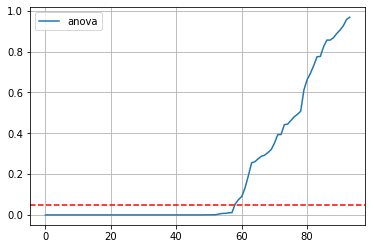

In [96]:
# the plot to show number of features within threshold by the above method
plt.plot(np.sort(anova_selector.pvalues_),label='anova')
plt.axhline(0.05,color='r', linestyle='--')
plt.grid()
plt.legend()

print('no. of features within p_value th: anova',sum(anova_selector.pvalues_<0.05))

### RFE, RFECV

use with A supervised learning estimator with a fit method that provides information about feature importance either through a coef_ attribute or through a feature_importances_ attribute. (Trees, SVM- SVR,SVC)

sklearn.feature_selection.RFECV

In [97]:
# RFECV using SVC
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC

k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42) #CV splitter

estimator_svc = SVC(class_weight="balanced",kernel='linear') #SVC estimator, 
#Note: only linear kernel has coef_ #coef_ is required by RFECV

rfe_selector = RFECV(estimator=estimator_svc, step=4,min_features_to_select=10, cv=k_fold, scoring='roc_auc',verbose=10)
# step: no. of features to remove at each iteration

X_rfecv=rfe_selector.fit_transform(X_s, y) # fit transform on rfe_selector gives 
mask_rfe = rfe_selector.get_support()
rfe_features=rfe_selector.get_feature_names_out() # mask support, get_feature_names_out

Fitting estimator with 94 features.
Fitting estimator with 90 features.
Fitting estimator with 86 features.
Fitting estimator with 82 features.
Fitting estimator with 78 features.
Fitting estimator with 74 features.
Fitting estimator with 70 features.
Fitting estimator with 66 features.
Fitting estimator with 62 features.
Fitting estimator with 58 features.
Fitting estimator with 54 features.
Fitting estimator with 50 features.
Fitting estimator with 46 features.
Fitting estimator with 42 features.
Fitting estimator with 38 features.
Fitting estimator with 34 features.
Fitting estimator with 30 features.
Fitting estimator with 26 features.
Fitting estimator with 22 features.
Fitting estimator with 18 features.
Fitting estimator with 14 features.
Fitting estimator with 94 features.
Fitting estimator with 90 features.
Fitting estimator with 86 features.
Fitting estimator with 82 features.
Fitting estimator with 78 features.
Fitting estimator with 74 features.
Fitting estimator with 70 fe

In [99]:
# selector attributes
#ranking_
rfe_selector.ranking_
#cv_results_
rfe_selector.cv_results_
# plot scores wrt features 
rfe_selector.cv_results_['mean_test_score']
rfe_selector.cv_results_['std_test_score']

array([ 4,  7,  4, 13, 13,  3,  3,  3,  3,  2, 12, 16,  6, 15, 17,  1,  2,
        9,  1, 19, 22,  1, 18,  9, 19,  2,  1, 21, 17, 22, 18, 14,  7, 19,
       17, 10,  1,  1, 12,  1, 18,  4, 15, 10,  5,  2, 12, 14, 16,  9, 20,
       14, 11, 11,  8, 17,  8, 22, 21,  1,  6, 16, 16,  1,  9,  5, 18, 15,
        8, 22, 21, 12, 19,  6,  6, 14,  7,  5,  5, 20,  7, 11, 10,  8, 21,
        4, 15, 20, 13, 10,  1, 13, 20, 11])

array([0.03767461, 0.06823844, 0.07148124, 0.07391887, 0.07842487,
       0.08193634, 0.08459699, 0.09003031, 0.07850082, 0.0750934 ,
       0.08198598, 0.08132708, 0.07975397, 0.08200873, 0.08202643,
       0.08543966, 0.08683128, 0.08630794, 0.08635282, 0.08710334,
       0.08678824, 0.08687812])

In [100]:
sum(mask_rfe)

10

In [103]:
# RFECV using trees
from sklearn.feature_selection import RFECV
k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
estimator_tree=DecisionTreeClassifier(class_weight='balanced')
rfe_selector_tree=RFECV(estimator=estimator_tree, step=1,min_features_to_select=10, cv=k_fold, scoring='roc_auc',verbose=10)
X_rfecv=rfe_selector_tree.fit_transform(X, y) # fit transform on rfe_selector gives 
mask_rfe_tree = rfe_selector_tree.get_support()
rfe_features_tree=rfe_selector_tree.get_feature_names_out() # mask support, get_feature_names_out

Fitting estimator with 94 features.
Fitting estimator with 93 features.
Fitting estimator with 92 features.
Fitting estimator with 91 features.
Fitting estimator with 90 features.
Fitting estimator with 89 features.
Fitting estimator with 88 features.
Fitting estimator with 87 features.
Fitting estimator with 86 features.
Fitting estimator with 85 features.
Fitting estimator with 84 features.
Fitting estimator with 83 features.
Fitting estimator with 82 features.
Fitting estimator with 81 features.
Fitting estimator with 80 features.
Fitting estimator with 79 features.
Fitting estimator with 78 features.
Fitting estimator with 77 features.
Fitting estimator with 76 features.
Fitting estimator with 75 features.
Fitting estimator with 74 features.
Fitting estimator with 73 features.
Fitting estimator with 72 features.
Fitting estimator with 71 features.
Fitting estimator with 70 features.
Fitting estimator with 69 features.
Fitting estimator with 68 features.
Fitting estimator with 67 fe

In [122]:
#number of features selected by rfe tree
rfe_selector_tree.n_features_

41

In [123]:
# number of features combinations of selections
sum(mask_rfe&mask_rfe_tree&mask_anova)

3

In [124]:
sum(mask_rfe&mask_rfe_tree&mask_full_anova)

4

In [125]:
sum(mask_rfe_tree&mask_anova)

6

In [141]:
sum(mask_rfe_tree&mask_full_anova)

22

In [127]:
sum(mask_rfe&mask_rfe_tree)

4

In [128]:
sum(mask_rfe&mask_anova)

4

In [129]:
sum(mask_rfe&mask_full_anova)

9

In [136]:
print(sum(mask_anova),sum(mask_full_anova),sum(mask_rfe),sum(mask_rfe_tree))

10 58 10 41


In [164]:
# from above combinations we choose the following masks
mask1=mask_rfe_tree&mask_full_anova #22 features
mask2=mask_rfe&mask_full_anova #9 features
mask3=mask_rfe&mask_rfe_tree&mask_full_anova # 4 features

# df with selected features
# X[X.columns[mask1]]

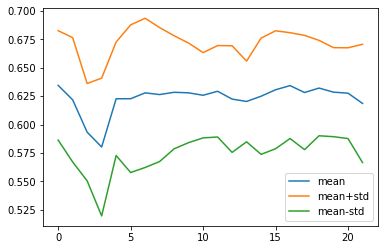

In [125]:
# selector attributes

#cv_results_
rfe_selector.cv_results_
# plot scores wrt features 
plt.plot(rfe_selector.cv_results_['mean_test_score'],label='mean')
plt.plot(rfe_selector.cv_results_['mean_test_score']+rfe_selector.cv_results_['std_test_score'],label='mean+std')
plt.plot(rfe_selector.cv_results_['mean_test_score']-rfe_selector.cv_results_['std_test_score'],label='mean-std')
plt.legend()

#### Select from model- things that give sparse weights/coef (like lasso) or feature importance
1. L1 based-- i.e. keep the penalty as L1--- 
    * svc, logisticreg: classification task 
    * lasso : regression task

2. Tree based- 

Note: this is basically RFE but without iteration, it removes directly, RFE removes step by step. Hence this is less robust.

In [ ]:
# select from model logistic regression (penalty=L1)

#### sequential - forward/ backward

https://scikit-learn.org/stable/auto_examples/feature_selection/plot_select_from_model_diabetes.html#sphx-glr-auto-examples-feature-selection-plot-select-from-model-diabetes-py

## Data Viz

In [ ]:
# visualize target and selected features, linear non linear relationships
# see if transformation helps
# corr plot, boxplot with hue, scatterplot with hue

In [175]:
# histogram color coded

## Model Fitting

Applying Logistic regression

In [176]:
# simplest model

sum(y==0)/(sum(y==1)+sum(y==0)) # simplest prediction will be to predict all as 0 i.e. not bankrupt
# will get ~97% accuracy

# need to better this

0.9683222526398123

In [177]:
from sklearn.linear_model import LogisticRegression 

In [286]:
x1=X_s[X.columns[mask1]]
x2=X_s[X.columns[mask2]]
x3=X_s[X.columns[mask3]]

In [287]:
x3.index

RangeIndex(start=0, stop=5114, step=1)

In [288]:
y=y.reset_index(drop=True) # reset index to match with that of X
y.head()

,Bankrupt?
0,0
1,0
2,0
3,0
4,0


In [298]:
model1=LogisticRegression(random_state=42,class_weight='balanced',solver='lbfgs')
lr_f1=model1.fit(x1, y.values.ravel())
yp1=lr_f1.predict(x1) 
lr_f1.score(x1,y.values.ravel())

0.8699648025029332

In [299]:
model2=LogisticRegression(random_state=42,class_weight='balanced',solver='lbfgs')
lr_f2=model2.fit(x2, y.values.ravel())
yp2=lr_f2.predict(x2) 
lr_f2.score(x2,y.values.ravel())

0.8596010950332421

In [300]:
model3=LogisticRegression(random_state=42,class_weight='balanced',solver='lbfgs')
lr_f3=model3.fit(x3, y.values.ravel())
yp3=lr_f3.predict(x3) 
display(lr_f3.score(x3,y.values.ravel()))
lr_f3.coef_

0.8584278451310129

array([[-2.47996198, -1.10302011,  0.38325815, -0.05665312]])

In [351]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report, fbeta_score
confusion_matrix(y,yp1)

array([[4305,  647],
       [  18,  144]], dtype=int64)

In [302]:
precision_score(y,yp1)

0.1820480404551201

In [303]:
recall_score(y,yp1)

0.8888888888888888

In [317]:
# select models based on test errors (no analysis or tuning with this set)
Xt=df_test.drop(y_name,axis=1)
yt=df_test[y_name]

# standardize
Xt=var_sel0.transform(Xt)
Xt_s=scaler.transform(Xt)

Xt_s=pd.DataFrame(Xt_s,columns=X.columns)

#putting the masks
xt1=Xt_s[X.columns[mask1]]
xt2=Xt_s[X.columns[mask2]]
xt3=Xt_s[X.columns[mask3]]

yt1=lr_f1.predict(xt1)
yt2=lr_f2.predict(xt2) 
yt3=lr_f3.predict(xt3) 

C:\Users\prano\anaconda3\envs\finance\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [311]:
xt1.shape

(1705, 22)

In [312]:
lr_f1.score(xt1,yt)

0.8680351906158358

In [313]:
lr_f2.score(xt2,yt)

0.864516129032258

In [314]:
lr_f3.score(xt3,yt)

0.8609970674486803

In [320]:
precision_score(yt,yt3)

0.18081180811808117

In [322]:
recall_score(yt,yt3)

0.8620689655172413

In [327]:
f1_score(yt,yt3)

0.29673590504451036

In [350]:
print(classification_report(yt,yt3))

              precision    recall  f1-score   support

           0       0.99      0.86      0.92      1647
           1       0.18      0.86      0.30        58

    accuracy                           0.86      1705
   macro avg       0.59      0.86      0.61      1705
weighted avg       0.97      0.86      0.90      1705



In [343]:
y_lazy0=np.zeros(len(yt))
y_lazy1=np.ones(len(yt))

In [346]:
print('the lazy prediction')
print(classification_report(yt,y_lazy0))

the lazy prediction
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1647
           1       0.00      0.00      0.00        58

    accuracy                           0.97      1705
   macro avg       0.48      0.50      0.49      1705
weighted avg       0.93      0.97      0.95      1705



C:\Users\prano\anaconda3\envs\finance\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prano\anaconda3\envs\finance\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prano\anaconda3\envs\finance\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### The Metric
**Accuracy** for such an imbalanced data, accuracy is not a good metric for the model. The metric of choice will depend on the task at hand.

If we assume the case that we do not want to missclassify a bankrupt company. Then **recall of 1** is a good metric. 
Since the positive class (bankrupt=1) is more important, and the false negative is more costly (i.e. the failure to recognise a bankrupt company), hence **F2 score** is the preffered metric.


Fbeta = ((1 + beta^2) * Precision * Recall) / (beta^2 * Precision + Recall)
* F0.5-Measure (beta=0.5): More weight on precision, less weight on recall.
* F1-Measure (beta=1.0): Balance the weight on precision and recall.
* F2-Measure (beta=2.0): Less weight on precision, more weight on recall

In [357]:
fbeta_score(yt,y_lazy0,beta=2)

0.0

In [361]:
fbeta_score(yt,yt3,beta=2)

0.48923679060665365

In [ ]:
# improve upon the basic model-- based on inferences from above steps
#data transformation, removing outliers(from train), increasing/decreasing features.

### Playing with threshold of probability to improve train error

Note: logistic regression regresses on 0 and 1 and predicts the probability of classes 0 and 1. Hence threshold is not a parameter of the model. So, we can apply it during prediction.

In [362]:
ypp3=lr_f3.predict_proba(x3)

In [375]:
np.sum(y.values)

162

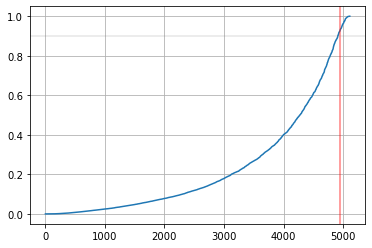

In [381]:
plt.plot(np.sort(ypp3[:,1])) # probability of 1, ypp3[:,1]
plt.axvline(len(y)-np.sum(y.values),color='red',alpha=0.5)# plot a vline at the total number of negatives
plt.axhline(0.9,color='gray',alpha=0.2)
plt.grid()

In [417]:
thp=np.arange(0.4,0.8,0.02)
for t in thp:
    yp3=(ypp3[:,1]>t)*1
    print(fbeta_score(y,yp3,beta=2).round(4),t)

0.4223 0.4
0.4379 0.42000000000000004
0.4468 0.44000000000000006
0.4563 0.4600000000000001
0.464 0.4800000000000001
0.4671 0.5000000000000001
0.4813 0.5200000000000001
0.4879 0.5400000000000001
0.504 0.5600000000000002
0.5008 0.5800000000000002
0.5181 0.6000000000000002
0.5235 0.6200000000000002
0.5191 0.6400000000000002
0.5141 0.6600000000000003
0.5127 0.6800000000000003
0.5014 0.7000000000000003
0.5014 0.7200000000000003
0.4976 0.7400000000000003
0.4956 0.7600000000000003
0.496 0.7800000000000004


## test set on this new threshold

In [418]:
# threshold=0.62 gives max f2 score
yppt3=lr_f3.predict_proba(xt3)
ypt3=(yppt3[:,1]>0.62)*1
fbeta_score(yt,ypt3,beta=2).round(4)

0.5402

In [419]:
confusion_matrix(yt,ypt3)

array([[1491,  156],
       [  11,   47]], dtype=int64)

In [420]:
# compared to confusion matrix with th=0.5
confusion_matrix(yt,yt3)

array([[1418,  229],
       [   8,   50]], dtype=int64)

In [430]:
print(classification_report(yt,ypt3))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95      1647
           1       0.23      0.81      0.36        58

    accuracy                           0.90      1705
   macro avg       0.61      0.86      0.65      1705
weighted avg       0.97      0.90      0.93      1705



### Summary

1. We started with a **95** feature data.
2. From feature selection we found some reduced set of features.
3. We used LogisticRegression on these sets of features.
4. Based on metrics on test data- we chose model with **3** features.
